In [1]:
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json

sns.set(context="paper", style="whitegrid", font_scale=1.5)
%matplotlib inline

In [2]:
runs = []
for config_file in glob("../logs/200727_first_experiment/*/config.json"):
    with open(config_file) as infile:
        config = pd.Series(json.load(infile))
    with open(config_file[:-11] + "run.json") as infile:
        result = pd.Series(json.load(infile)["result"], dtype=np.float32)
    run_data = pd.concat([config, result])
    runs.append(run_data)
runs_all = pd.concat(runs, axis=1).T

In [3]:
runs_all.head()

,bias_loc,bias_prior,bias_scale,burnin,cycles,data,inference,lr,model,momentum,...,skip,temperature,warmup,weight_loc,weight_prior,weight_scale,width,lp_mean,lp_std,lp_stderr
0,0,gaussian,1,2000,5,UCI_boston,SGLD,0.0005,densenet,0.9,...,5,1,2000,0,gaussian,1.41421,50,-0.280464,0.721135,0.100979
1,0,gaussian,1,2000,5,UCI_power,HMC,0.0005,densenet,0.9,...,5,1,2000,0,uniform,1.41421,50,-1.44799,0.51888,0.016773
2,0,gaussian,1,2000,5,UCI_concrete,HMC,0.0005,densenet,0.9,...,5,1,2000,0,cauchy,1.41421,50,-264121,595731,58699.1
3,0,gaussian,1,2000,5,UCI_kin8nm,SGLD,0.0005,densenet,0.9,...,5,1,2000,0,cauchy,1.41421,50,NaN,NaN,NaN
4,0,gaussian,1,2000,5,UCI_kin8nm,HMC,0.0005,densenet,0.9,...,5,1,2000,0,cauchy,1.41421,50,-1.61363e+08,2.11492e+08,7.39011e+06


In [4]:
runs_selected = runs_all.query("weight_prior in ['gaussian', 'uniform', 'laplace']")

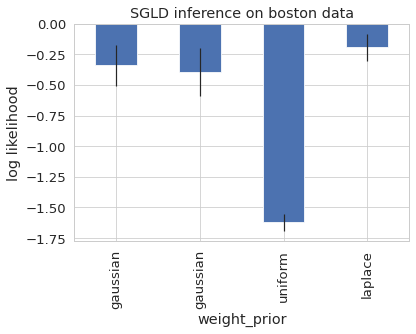

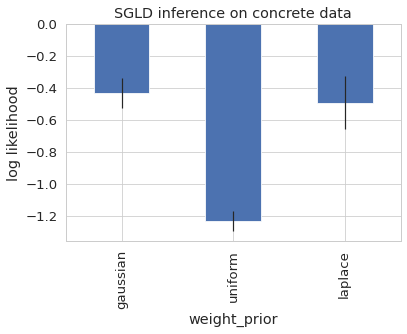

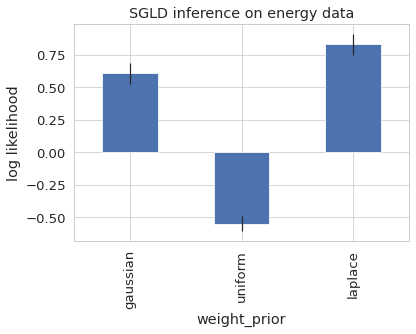

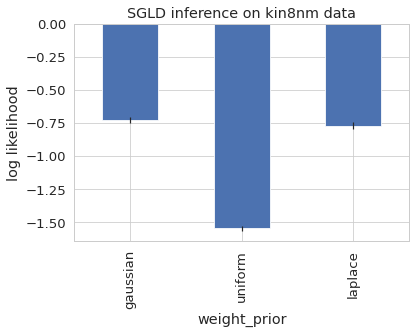

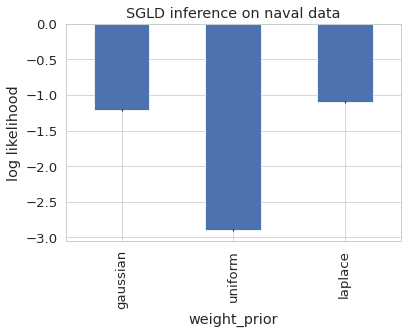

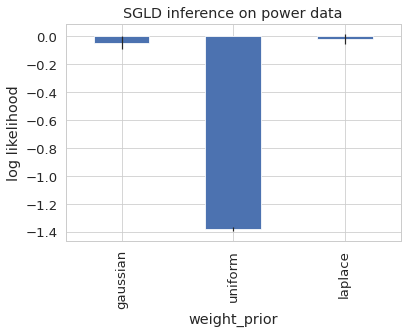

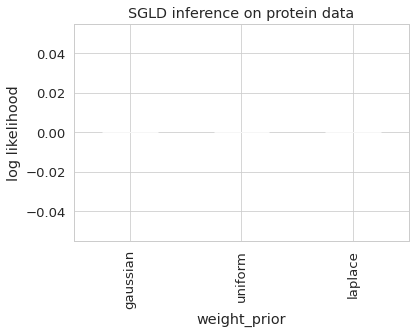

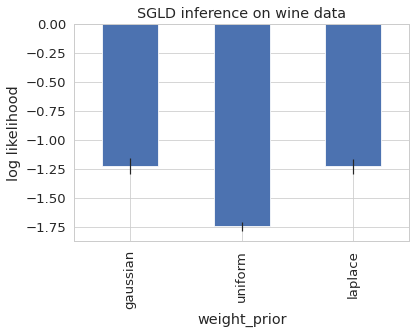

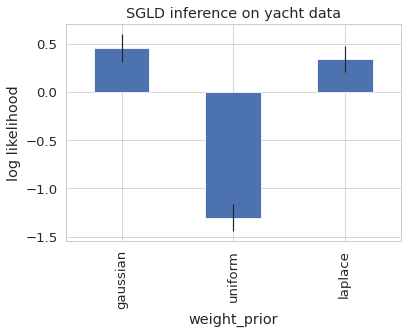

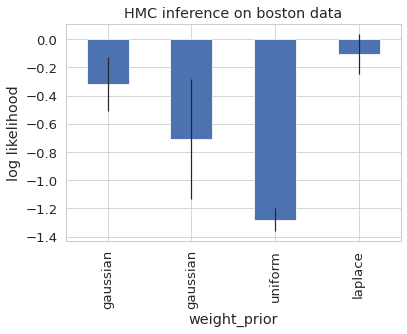

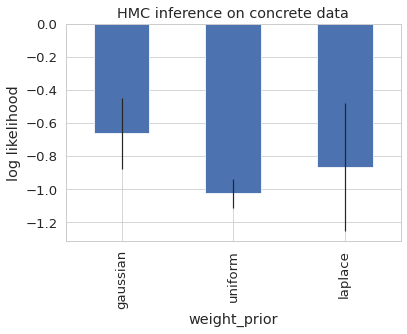

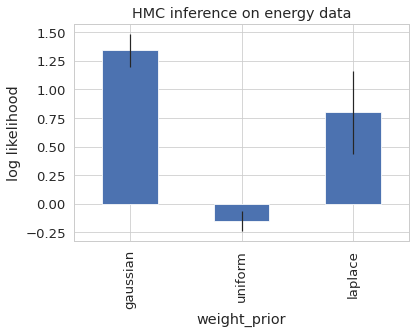

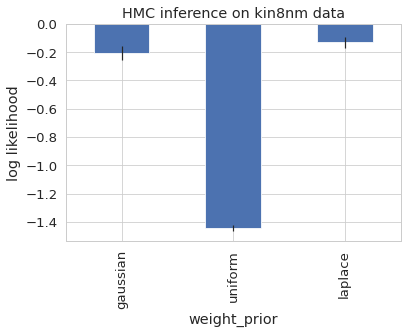

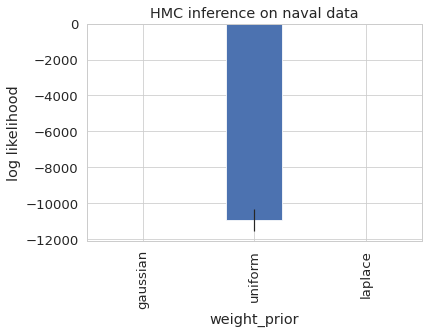

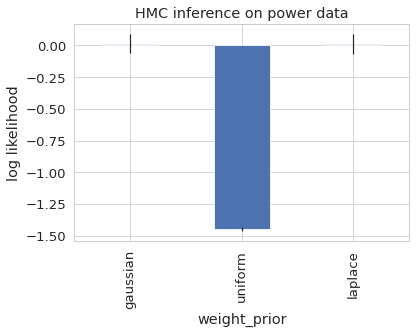

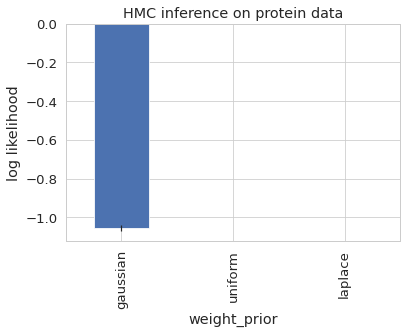

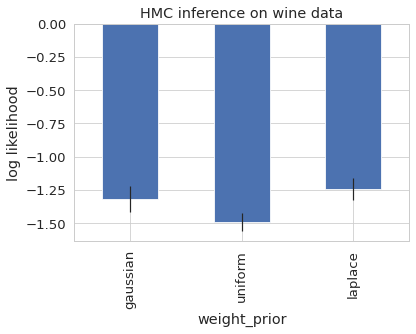

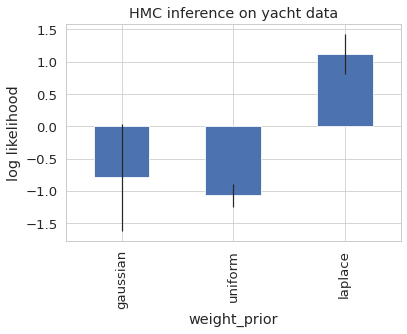

In [5]:
for inference in ["SGLD", "HMC"]:
    for data in ["boston", "concrete", "energy", "kin8nm",
                    "naval", "power", "protein", "wine", "yacht"]:
        df = runs_selected.query(f"inference == '{inference}' & burnin==5000 & data == 'UCI_{data}'")
        df.plot(x="weight_prior", y="lp_mean", yerr="lp_stderr", kind="bar", legend=False)
        plt.title(f"{inference} inference on {data} data")
        plt.ylabel("log likelihood")
        plt.show()